In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [17]:
p_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/condition/random'
p_out_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/condition/random'

In [18]:
cases = ['ASD',
        'SZ',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

In [19]:
sns.set_style('whitegrid')

# MLP - CONFOUNDS
## Single Task

In [20]:
res_single_conf = {}
for case in cases:
    p = os.path.join(p_parent,'confounds',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    res_single_conf[case] = folds

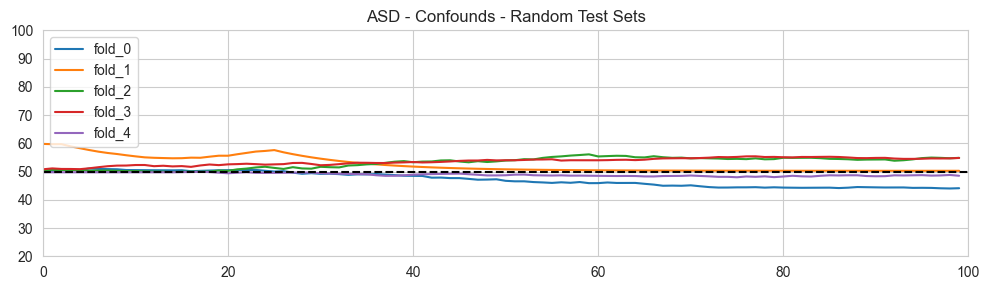

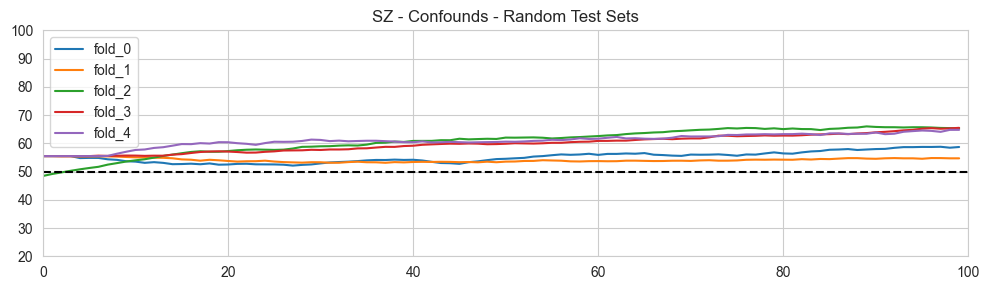

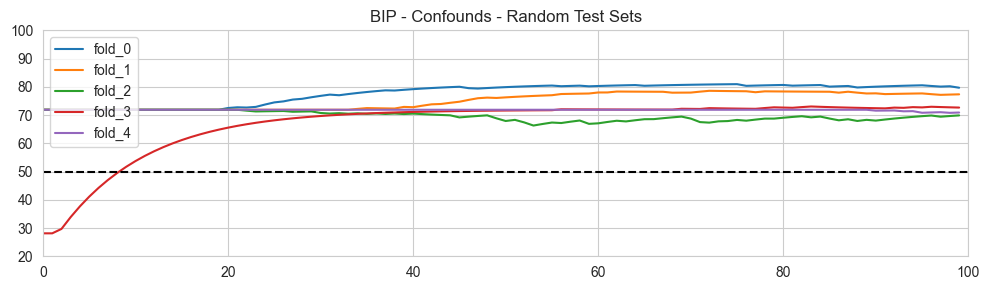

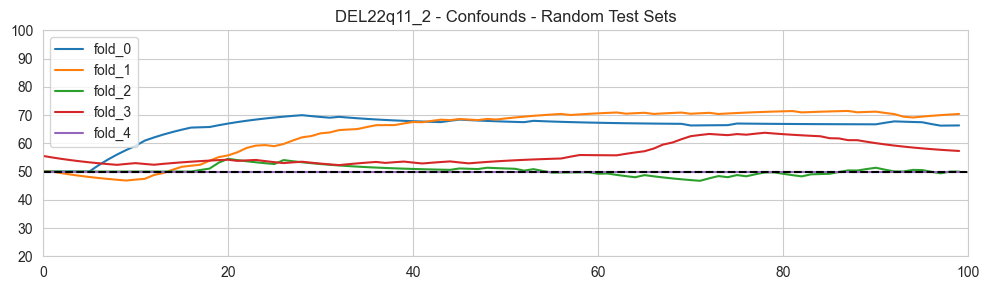

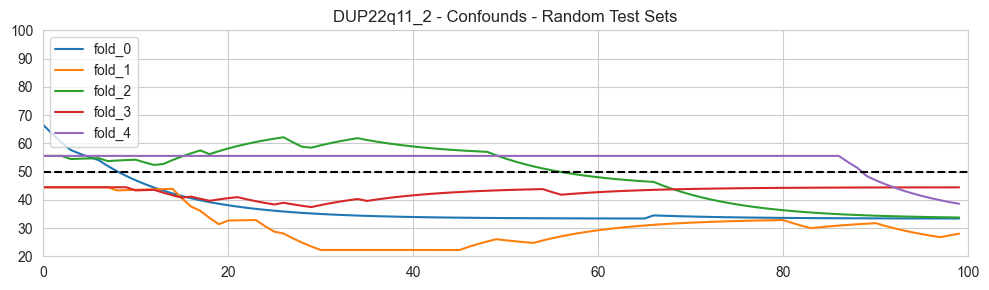

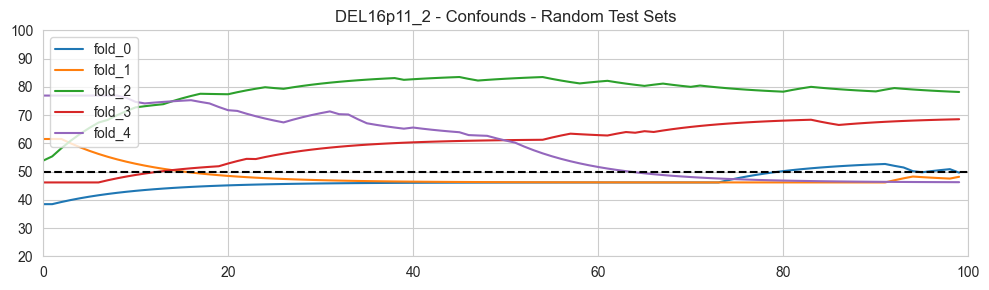

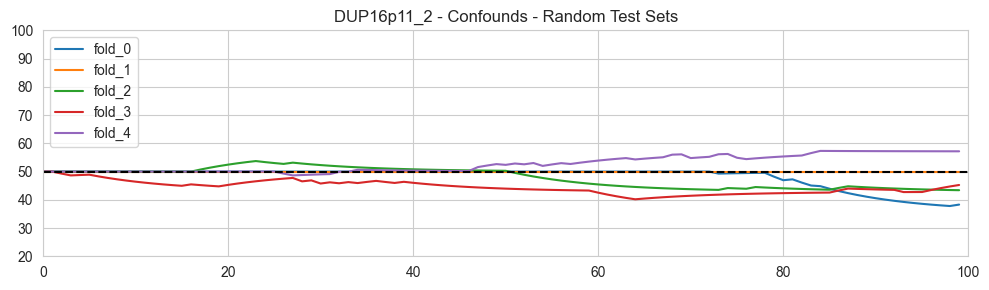

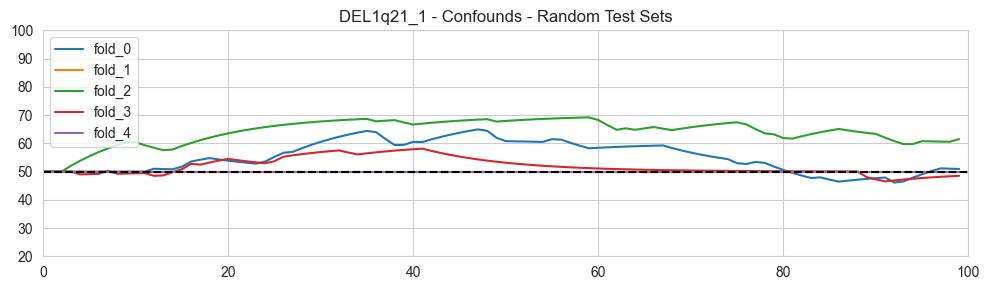

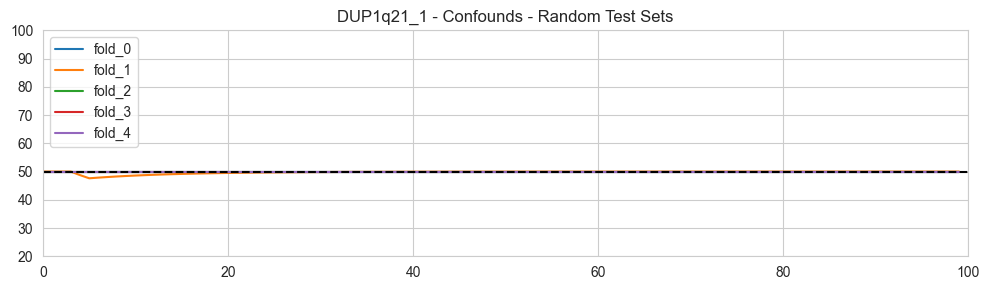

In [24]:
for case in res_single_conf:
    fig,ax = plt.subplots(figsize=(10,3))
    plt.ylim(20,100)
    plt.xlim(0,100)
    for i,df in enumerate(res_single_conf[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.title(f'{case} - Confounds - Random Test Sets')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'confounds/figures/{case}.png'),dpi=300)
    plt.show()

## Multi-Task

In [25]:
n_folds = 5

p = os.path.join(p_parent,'confounds/all')
folds_conf = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds_conf.append(df)

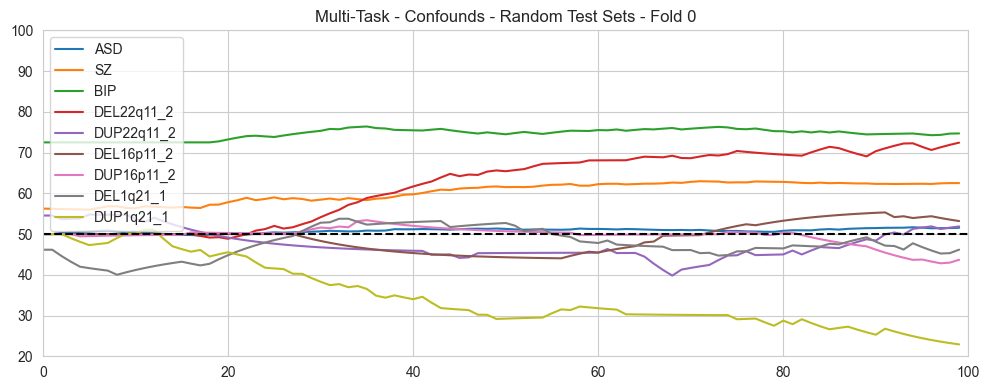

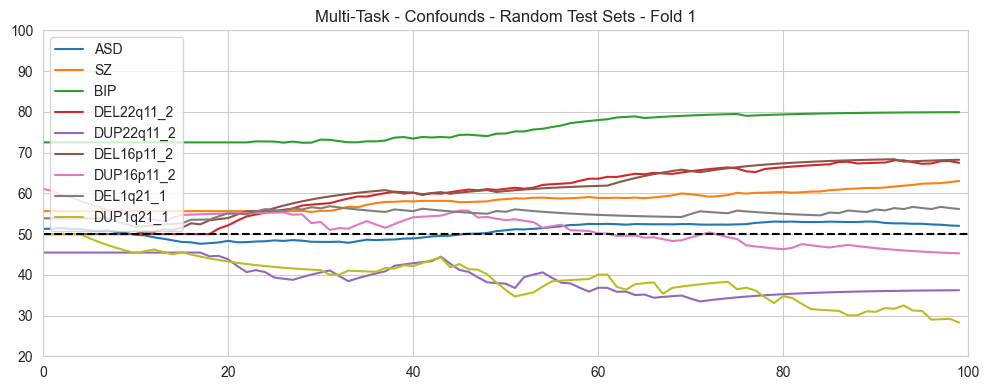

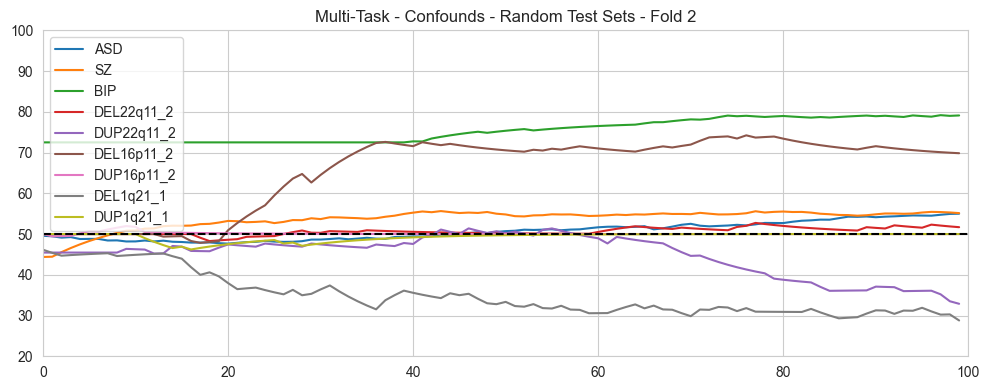

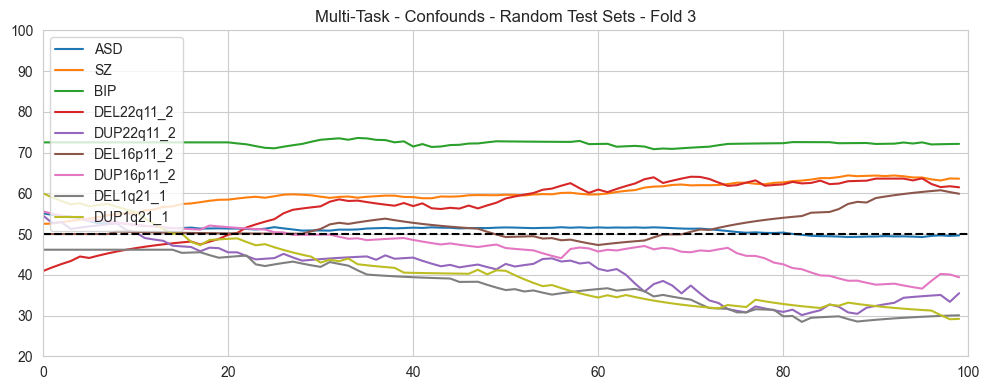

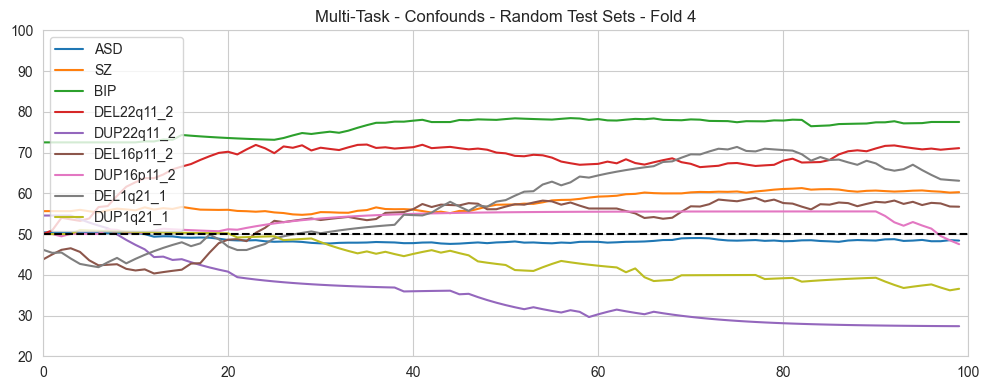

In [26]:
for i,df in enumerate(folds_conf):
    plt.figure(figsize=(10,4))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    plt.title(f'Multi-Task - Confounds - Random Test Sets - Fold {i}')

    plt.xlim(0,100)
    plt.ylim(20,100)
    plt.legend(loc="upper left")
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'confounds/figures/all_fold{i}.png'))
    plt.show()

# MLP - CONNECTOMES
## Single Task

In [11]:
res_single_conn = {}
for case in cases:
    p = os.path.join(p_parent,'connectomes',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    res_single_conn[case] = folds

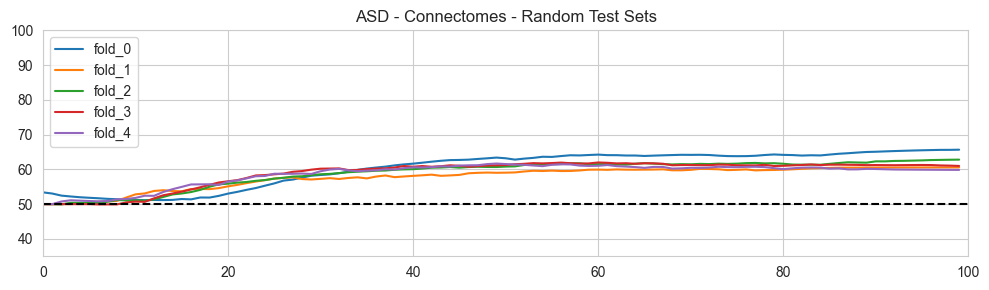

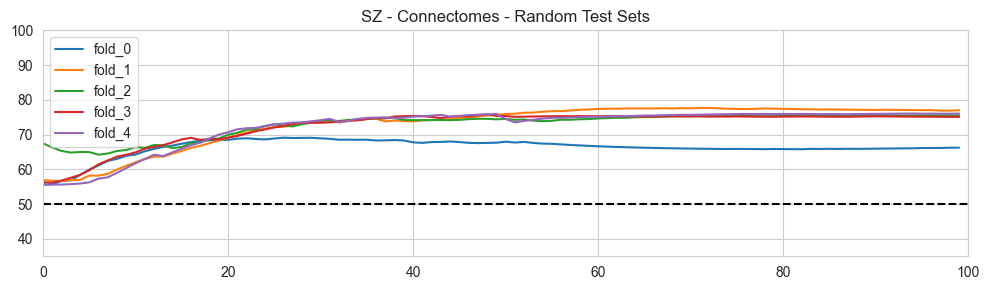

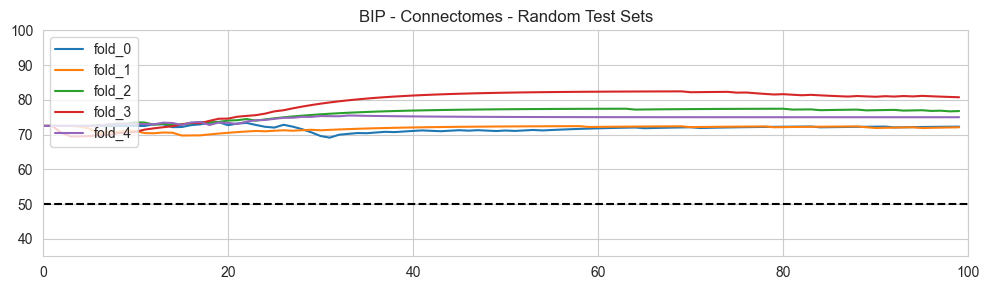

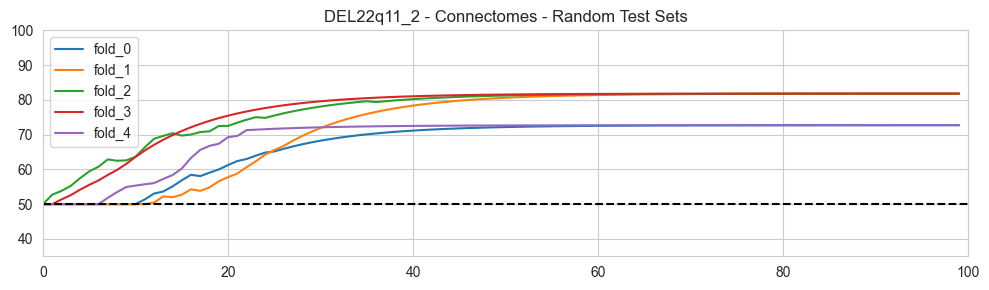

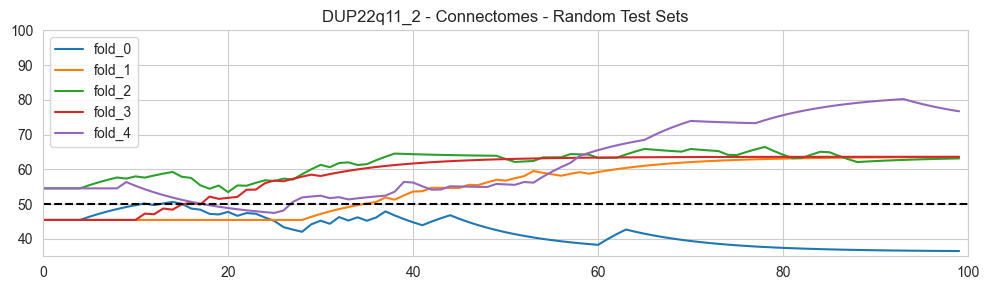

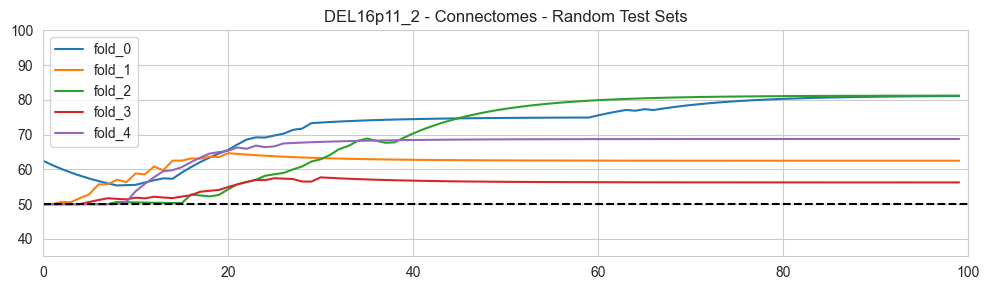

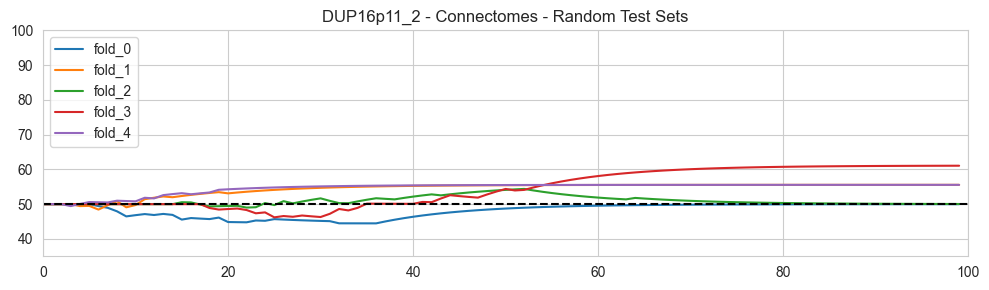

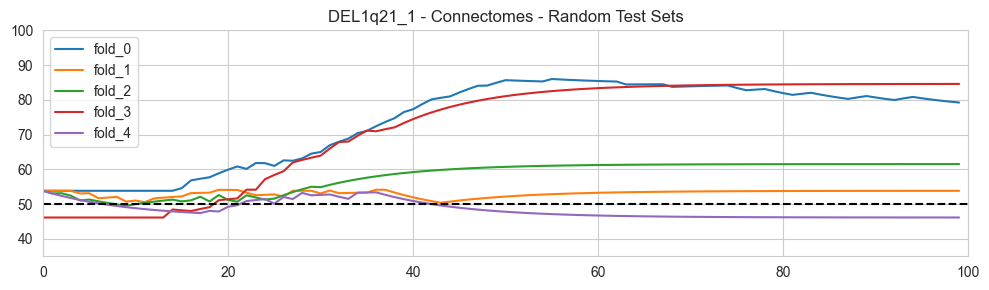

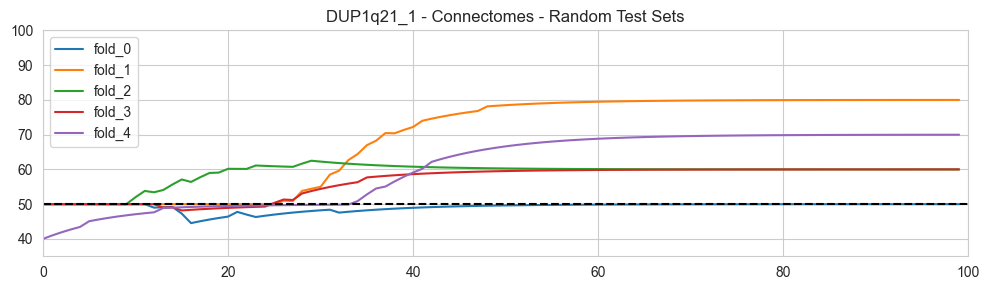

In [27]:
for case in res_single_conn:
    fig,ax = plt.subplots(figsize=(10,3))
    for i,df in enumerate(res_single_conn[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.ylim(35,100)
    plt.xlim(0,100)
    plt.title(f'{case} - Connectomes - Random Test Sets')
    plt.legend(loc="upper left")
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/{case}.png'),dpi=300)
    plt.show()

## Multi-Task

In [28]:
n_folds = 5

p = os.path.join(p_parent,'connectomes/all')
folds_conn = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds_conn.append(df)

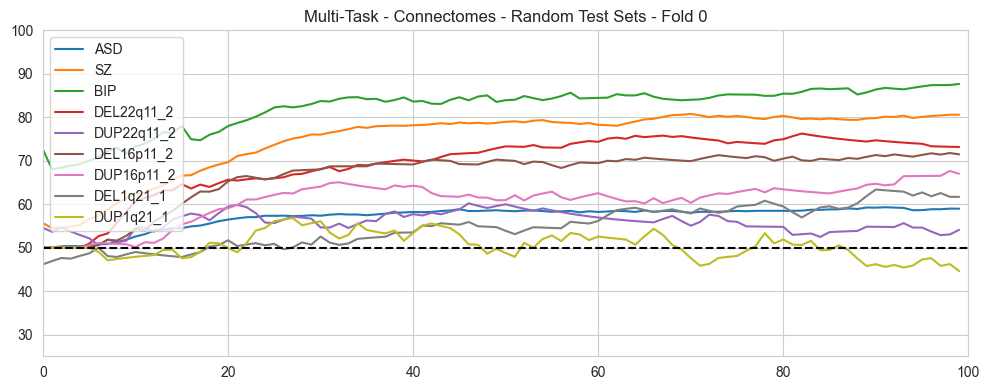

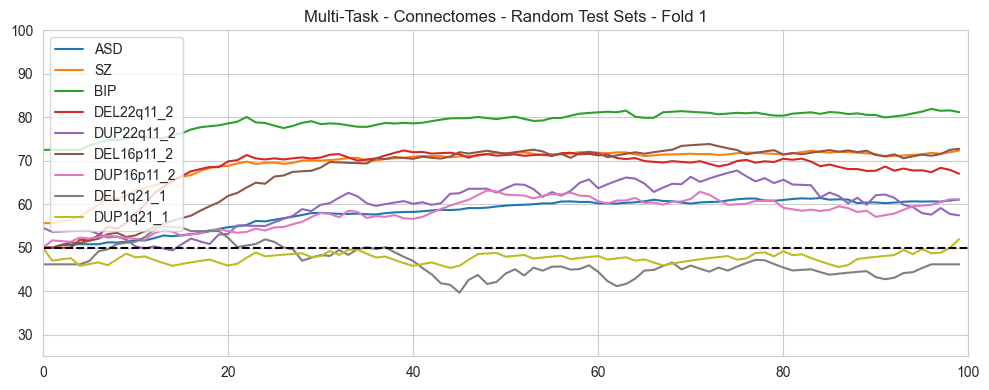

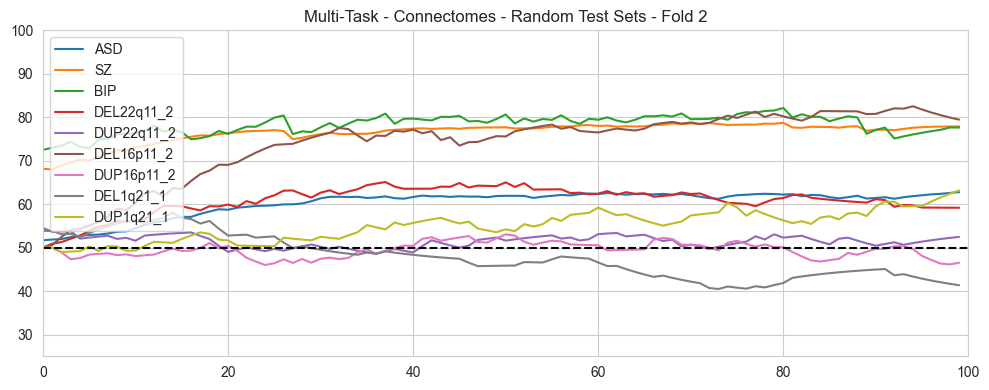

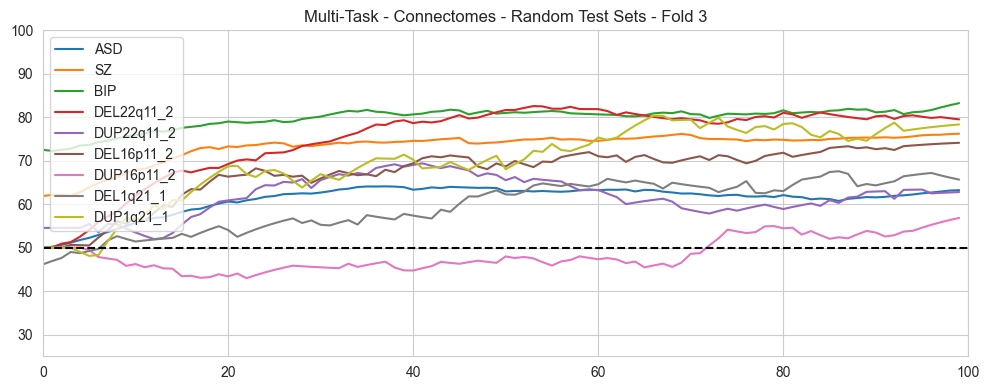

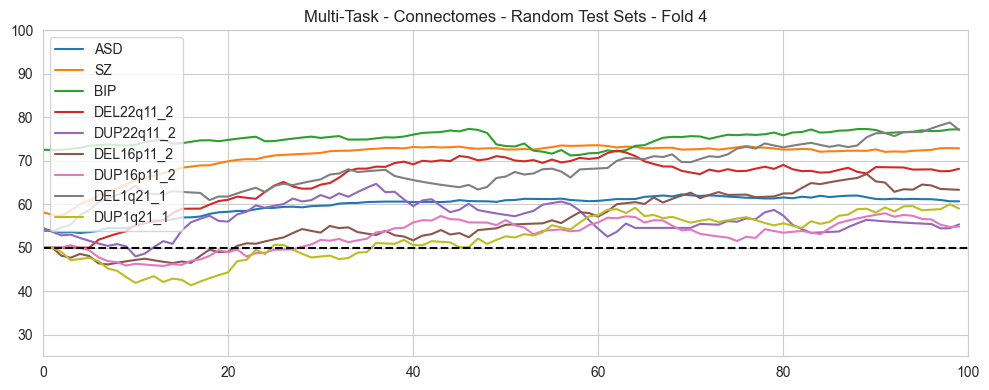

In [29]:
for i,df in enumerate(folds_conn):
    plt.figure(figsize=(10,4))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    plt.title(f'Multi-Task - Connectomes - Random Test Sets - Fold {i}')

    plt.xlim(0,100)
    plt.ylim(25,100)
    plt.legend(loc="upper left")
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/all_fold{i}.png'))
    plt.show()